In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import struct
import functions as datahelper
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
def loadpb(filename, model_name='dcgan'):
    """Loads pretrained graph from ProtoBuf file
    Arguments:
        filename - path to ProtoBuf graph definition
        model_name - prefix to assign to loaded graph node names
    Returns:
        graph, graph_def - as per Tensorflow definitions
    """
    with tf.gfile.GFile(filename, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def,
                            input_map=None,
                            return_elements=None,
                            producer_op_list=None,
                            name=model_name)

    return graph, graph_def

In [3]:
tf.reset_default_graph()

# hyperparameters -- TODO save in config file
batch_size=64
z_dim = 100 # random noise vector dimension 

beta1=0.5 # β1 Adam training param
learning_rate = 0.0002
lmda = 0.003 # λ ratio for prior loss

epochs = 5

In [4]:
# load frozen graph
graph, graph_def = loadpb("dcgan-100.pb")

g_in = graph.get_tensor_by_name('dcgan' +'/'+ 'z:0')
g_out = graph.get_tensor_by_name('dcgan'+'/'+ 'Tanh:0')
g_loss = graph.get_tensor_by_name('dcgan'+'/'+ 'Mean_2:0')
d_in = graph.get_tensor_by_name('dcgan'+'/'+ 'real_images:0')
d_out = graph.get_tensor_by_name('dcgan' +'/'+ 'Sigmoid:0')


In [5]:
# sample_img = tf.summary.image('generated_images', generated_images)
write = tf.summary.FileWriter('./summaries')

with tf.Session(graph=graph) as sess:
    z = np.random.randn(batch_size, z_dim)
    sample_out = sess.run(g_out, feed_dict={g_in: z})
    write.add_graph(graph)
#     write.add_summary(imgs)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


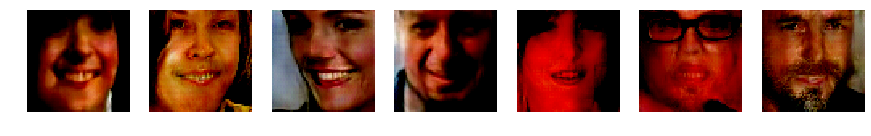

In [16]:
fig, ax = plt.subplots(1,7,figsize=(15,15))
for i in range(7):
    img = sample_out[i+25,:,:,:]
    ax[i].imshow(img)
    ax[i].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


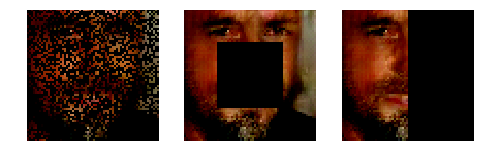

In [42]:
def make_mask(mask_type, img_size = 64, ratio = 0.25):
    # mask_type can be center, random, or half
    # img_size is int, defaults to 64
    # ratio is number < 0.5, either for amount masked in center or the percentage masked randomly
    mask = np.ones(shape=(img_size, img_size))
    assert(ratio < 0.5), "ratio must be less than 0.5"
    if mask_type == 'center':
        start = int(img_size*ratio)
        stop = int(img_size*(1-ratio))
        mask[start:stop, start:stop] = 0
    elif mask_type == 'random':
        rand_mask = np.random.randn(img_size, img_size)
        mask[rand_mask < ratio] = 0
    elif mask_type == 'half':
        half = img_size // 2
        mask[:, half:] = 0
    else:
        assert(False), "mask_type must be center, random, or half."
        
    # make mask 3D for rgb
    mask = mask.reshape(img_size, img_size, 1).repeat(3,2)
    
    return mask

msk = [make_mask('random'), make_mask('center'), make_mask('half')]

# visualize mask types
fig, ax = plt.subplots(1,3,figsize=(8,8))
for i in range(3):
    newimg = img*msk[i]
    ax[i].imshow(newimg)
    ax[i].axis('off')     
            

        
    